In [1]:
#Basic Lib
import pandas as pd
import numpy as np

#visualization Lib
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation Lib
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

#DL Lib
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

In [16]:
(x_train_digit,y_train_digit),(x_test_digit,y_test_digit)=mnist.load_data()

In [17]:
x_train_digit.shape

(60000, 28, 28)

In [18]:
y_train_digit.shape

(60000,)

In [19]:
y_train_digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

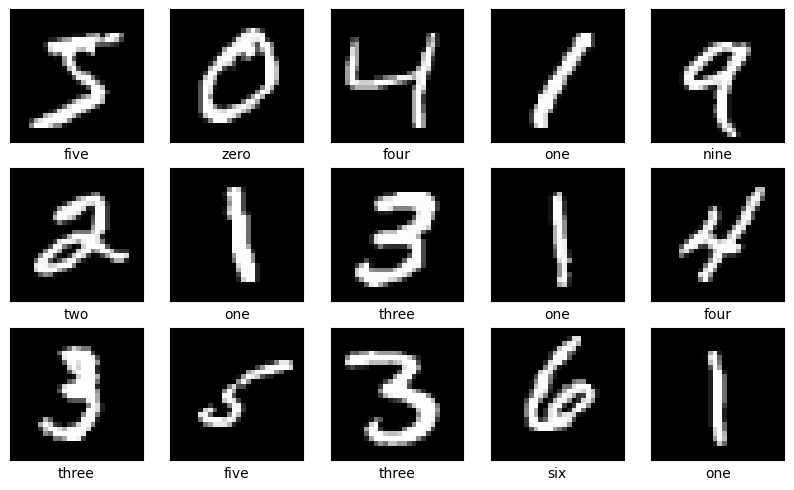

In [20]:
col_names=['zero','one','two','three','four','five','six','seven','eight','nine']

plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_digit[i],cmap='gray')
    plt.xlabel(col_names[y_train_digit[i]])
plt.show()

In [21]:
x_train_digit.shape,x_test_digit.shape

((60000, 28, 28), (10000, 28, 28))

In [22]:
x_train_digit=x_train_digit.reshape(60000,28,28,1)
x_test_digit=x_test_digit.reshape(10000,28,28,1)

In [23]:
x_train_digit[0].shape

(28, 28, 1)

In [24]:
x_train_digit.dtype

dtype('uint8')

In [25]:
x_train_digit=x_train_digit.astype('float32')
x_test_digit=x_test_digit.astype('float32')

In [27]:
x_train_digit.dtype

dtype('float32')

In [29]:
x_train_digit=x_train_digit/255
x_test_digit/=255

In [46]:
x_test_digit.shape

(10000, 28, 28, 1)

In [43]:
y_test_digit.shape

(10000,)

In [71]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten
model=Sequential()
model.add(Conv2D(28,kernel_size=(3,3),input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())        
    
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

In [72]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 28)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 4732)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               605824    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                      

In [73]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [74]:
history=model.fit(x_train_digit,y_train_digit,batch_size = 100,epochs=10,validation_data=(x_test_digit,y_test_digit))

Epoch 1/10
600/600 [==============================] - 11s 18ms/step - loss: 0.2603 - accuracy: 0.9230 - val_loss: 0.1041 - val_accuracy: 0.9681
Epoch 2/10
600/600 [==============================] - 12s 20ms/step - loss: 0.1053 - accuracy: 0.9689 - val_loss: 0.0658 - val_accuracy: 0.9796
Epoch 3/10
600/600 [==============================] - 12s 20ms/step - loss: 0.0729 - accuracy: 0.9785 - val_loss: 0.0561 - val_accuracy: 0.9813
Epoch 4/10
600/600 [==============================] - 12s 19ms/step - loss: 0.0543 - accuracy: 0.9836 - val_loss: 0.0522 - val_accuracy: 0.9837
Epoch 5/10
600/600 [==============================] - 11s 18ms/step - loss: 0.0439 - accuracy: 0.9864 - val_loss: 0.0463 - val_accuracy: 0.9848
Epoch 6/10
600/600 [==============================] - 11s 18ms/step - loss: 0.0350 - accuracy: 0.9887 - val_loss: 0.0451 - val_accuracy: 0.9861
Epoch 7/10
600/600 [==============================] - 11s 18ms/step - loss: 0.0288 - accuracy: 0.9904 - val_loss: 0.0464 - val_accuracy:

In [75]:
model.evaluate(x_test_digit,y_test_digit)

313/313 [==============================] - 1s 2ms/step - loss: 0.0462 - accuracy: 0.9860


[0.04618077725172043, 0.9860000014305115]

In [76]:
y_pred=model.predict(x_test_digit)

313/313 [==============================] - 1s 2ms/step


In [79]:
y_pred[0].shape

(10,)

In [82]:
y_pred=np.argmax(y_pred,axis=1)

In [83]:
y_pred,y_pred.shape

(array([7, 2, 1, ..., 4, 5, 6], dtype=int64), (10000,))

In [85]:
y_test_digit

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [86]:
cm=confusion_matrix(y_test_digit,y_pred)

In [87]:
cm

array([[ 969,    0,    1,    0,    1,    0,    4,    2,    3,    0],
       [   0, 1128,    2,    1,    0,    0,    2,    1,    1,    0],
       [   1,    1, 1019,    2,    1,    0,    1,    2,    5,    0],
       [   0,    0,    2,  999,    0,    2,    0,    2,    1,    4],
       [   0,    0,    0,    0,  974,    0,    2,    0,    0,    6],
       [   2,    0,    0,    9,    0,  873,    5,    0,    1,    2],
       [   1,    1,    0,    1,    1,    3,  949,    0,    2,    0],
       [   1,    1,   11,    3,    2,    0,    0, 1005,    2,    3],
       [   1,    0,    3,    4,    0,    1,    0,    3,  957,    5],
       [   1,    2,    0,    4,   11,    1,    0,    2,    1,  987]],
      dtype=int64)

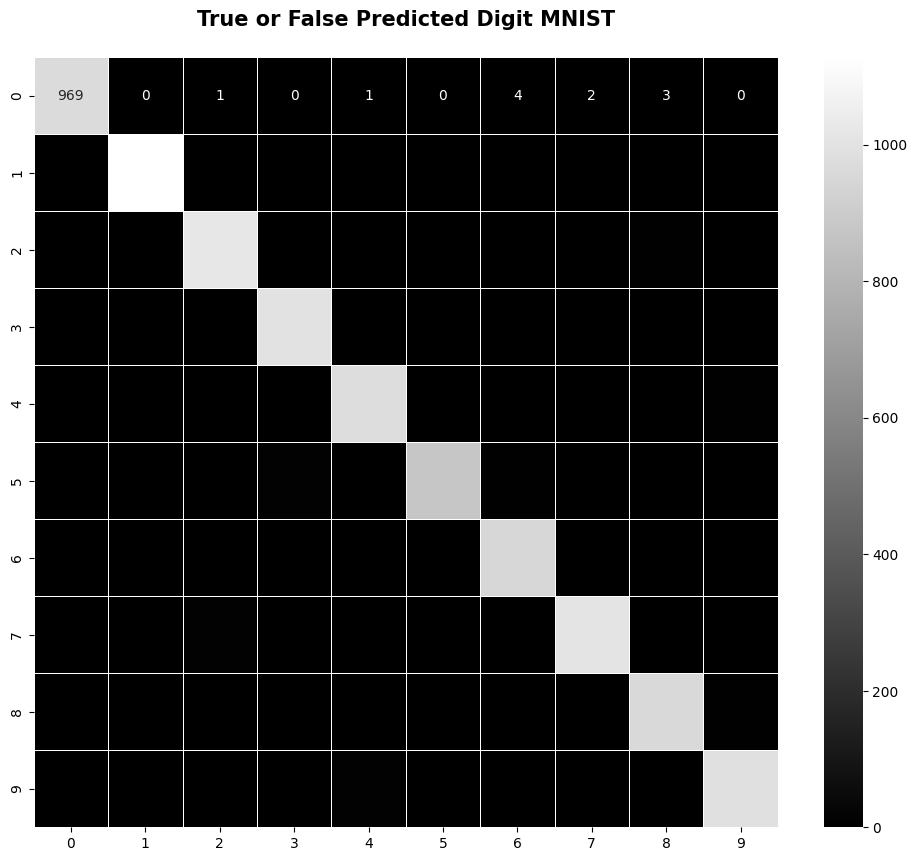

In [88]:
sns.set_palette('deep')
plt.figure(figsize=(12,10))
sns.heatmap(cm,annot=True,annot_kws={'size':10},linewidth=0.5,fmt='d',cmap='gray')
plt.title('True or False Predicted Digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [89]:
from sklearn.metrics import classification_report

In [90]:
print(classification_report(y_test_digit,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



<function matplotlib.pyplot.show(close=None, block=None)>

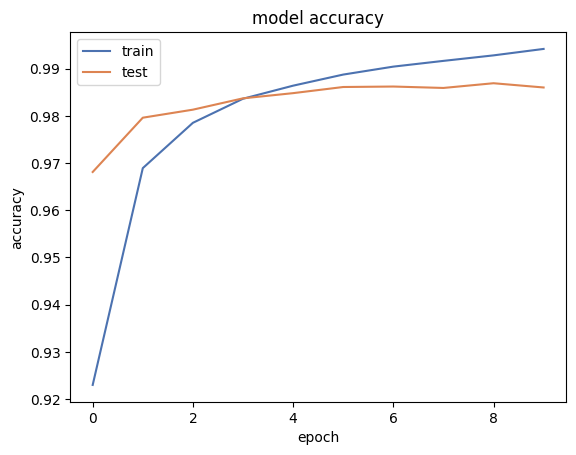

In [91]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='best')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

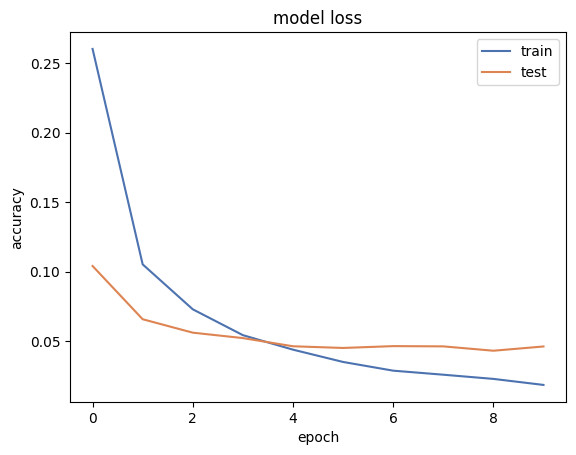

In [92]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='best')
plt.show

In [93]:
y_pred_single=model.predict(x_test_digit[[2]])
y_pred_single=np.argmax(y_pred_single,axis=1)

1/1 [==============================] - 0s 17ms/step


In [94]:
col_names

['zero',
 'one',
 'two',
 'three',
 'four',
 'five',
 'six',
 'seven',
 'eight',
 'nine']

In [97]:
y_pred_single

array([1], dtype=int64)

In [96]:
y_test_digit[2]

1

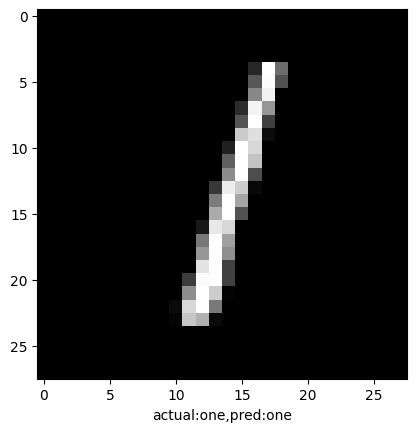

In [98]:
plt.imshow(x_test_digit[2],cmap='gray')
plt.xlabel("actual:{},pred:{}".format(col_names[y_test_digit[2]],col_names[y_pred_single[0]]))
plt.show()
                                     